In [3]:
import numpy as np
import matplotlib.pyplot as plt
from monte_carlo import *

## Example of Leapforg Algorithm
Consider the simple harmonic Hamiltonian
$$
H = q^2/2 + p^2/2.
$$
The solution is harmonic oscillation in both space $q$ and momentum $p$.



In [4]:
# H = K(p) + U(q) = p^2/2 + q^2/2
# dh_dq = du_dq = q
dh_dq = lambda q: q
# dh_dp = dk_dp = p
dh_dp = lambda p: p

leapfrog = hamiltonian.HamiltonLeapfrog(dh_dq, dh_dp, .1, 1)  # one step of size .1
def sample_motion(size, q_init, p_init, method):
    x = [(q_init, p_init)]
    for i in range(size):
        x.append(method(*x[-1]))
    return np.array(x).transpose()

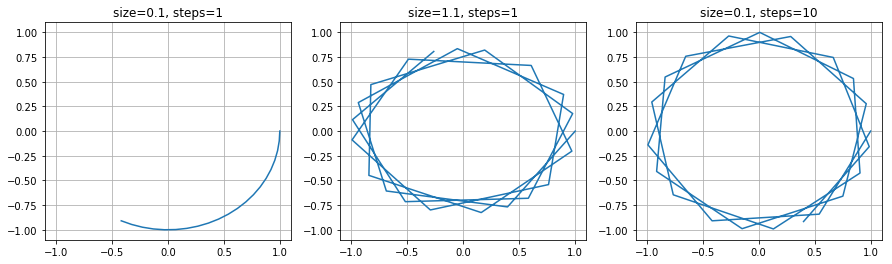

In [5]:
plt.figure(figsize=(5*3, 4))

plt.subplot(131)
leapfrog.step_size = .1
leapfrog.steps = 1
qs, ps = sample_motion(20, 1., 0., leapfrog)
plt.title("size=" + str(leapfrog.step_size) + ", steps=" + str(leapfrog.steps))
plt.plot(qs, ps)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid(True)

plt.subplot(132)
leapfrog.step_size = 1.1
leapfrog.steps = 1
qs, ps = sample_motion(20, 1., 0., leapfrog)
plt.title("size=" + str(leapfrog.step_size) + ", steps=" + str(leapfrog.steps))
plt.plot(qs, ps)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid(True)

plt.subplot(133)
leapfrog.step_size = .1
leapfrog.steps = 10
qs, ps = sample_motion(20, 1., 0., leapfrog)
plt.title("size=" + str(leapfrog.step_size) + ", steps=" + str(leapfrog.steps))
plt.plot(qs, ps)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid(True)
plt.show()

# Hamilton Monte Carlo
Have a Hamilton function with kinetic and potential terms:
$$
H(q, p) = U(q) + K(p)
$$

In analogy to canonical distribution have
$$
P(q,p) = \frac{1}{Z}\exp(-H(q,p)/T) = \frac{1}{Z} \exp(-U(q)/T) \exp(-K(p)/T) , 
$$
which means q and p are independent. The variable q is the variable of interest, where p are generally introdued to make the method work.
The above equation is used to sample q and p, such that q has the desired distribution; for T=1:
$$ U(q) = -log(P(q)) + const . $$
The distribution of p can theoretically be freely chosen. Common is a quadratic funciton in p (with $p_i$ having variance $m_i$) which leads to a multi variate Gaussian distribution.


In [6]:
# sampling a Gaussian <-> the harmonic potential

# standard metropolis algorithm with uniform proposal
s=1
pdf = lambda x: np.exp(-x**2/2/s**2) / np.sqrt(2 * np.pi * s**2)
metrop = DefaultMetropolis(1, pdf, proposal=lambda: -4*s + 2 * 4 * s *  np.random.rand())

# dh_dq = du_dq = q
dh_dq = lambda q: q / s**2

# hamilton monte carlo
pot = lambda q: -np.log(pdf(q)) # np.abs(q) / 2 - np.log(np.sqrt(2 * np.pi))
density = densities.Gaussian(1, scale=1)
momentum_dist = densities.Gaussian(1, scale=1)
hmcm = hamiltonian.HamiltonianUpdate(density, momentum_dist, steps=10, step_size=1)

Generated 1000 samples.
Generated 2000 samples.
Generated 3000 samples.
Generated 4000 samples.
Generated 5000 samples.
Generated 6000 samples.
Generated 7000 samples.
Generated 8000 samples.
Generated 9000 samples.
Generated 10000 samples.
Metrop acceptance rate: 0.3937, Hamilton acceptance rate: 0.9187
Metrop chi2: 2.9635, Hamiltonian chi2: 0.9935


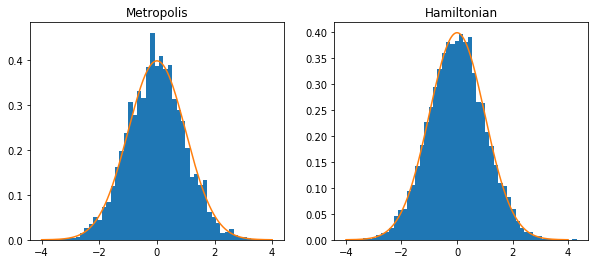

In [7]:
size = 10000
bins = 50
sample_met = metrop.sample(size, .1, log_every=0)
sample_hmc = hmcm.sample(size, .1, log_every=1000)
print("Metrop acceptance rate: %.4f, Hamilton acceptance rate: %.4f" % (sample_met.accept_ratio, sample_hmc.accept_ratio))
met_chi = util.binwise_chi2(pdf, sample_met.data, bins=bins)
hmcm_chi = util.binwise_chi2(pdf, sample_hmc.data, bins=bins)
print("Metrop chi2: %.4f, Hamiltonian chi2: %.4f" % (met_chi, hmcm_chi))

x = np.linspace(-4*s, 4*s, 1000)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Metropolis")
plt.hist(sample_met.data, bins=bins, normed=True)
plt.plot(x, pdf(x))


plt.subplot(122)
plt.title("Hamiltonian")
plt.hist(sample_hmc.data, bins=bins, normed=True)
plt.plot(x, pdf(x))
plt.show()

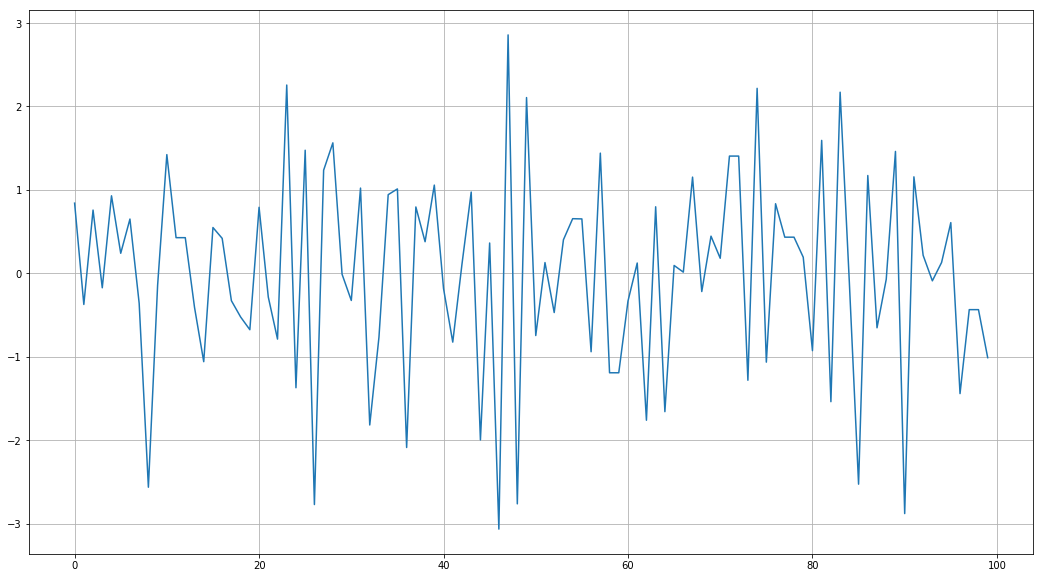

In [8]:
plt.figure(figsize=(18, 10))
plt.plot(sample_hmc.data[-100:])
plt.grid()
plt.show()